In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Linear Regression**


### Linear regression with 1 feature

In [2]:
# Sample data
X = [1, 2, 3, 4, 5]
y = [2, 3, 4, 5, 6]

In [3]:
def generateRandomNumber(randomSeed):
  random.seed(randomSeed)
  # Generate two random numbers by using random.random() and scale theta to be between -1 and + 1
  thetaArray = np.array([random.random() * 2 - 1 for i in range(2)])
  return thetaArray

generateRandomNumber(42)

array([ 0.2788536 , -0.94997849])

In [4]:
def prediction(theta0, theta1, X):
  # From y = m*x + c or prediction = weight * input + bias
  h = theta1*np.array(X) + theta0
  return h

theta0, theta1 = generateRandomNumber(42)
h = prediction(theta0, theta1, X)

h

array([-0.67112489, -1.62110338, -2.57108187, -3.52106036, -4.47103885])

In [5]:
def mseLoss(h, y):
  h, y = np.array(h), np.array(y)
  loss = np.square(h-y).mean()
  # Devided by 2 for easier backpropagation
  return loss/2

print("Loss:", mseLoss(h, y))

Loss: 25.391974592335018


In [6]:
def gradients(h, y, X):
  X = np.array(X)
  # Gradient of bias
  dTheta0 = (h - y).mean()
  # Gradient of weight
  dTheta1 = (np.dot(X, (h - y))* 1/X.shape[0])

  return [dTheta0, dTheta1]

gradients(h, y, X)

[np.float64(-6.571081871748231), np.float64(-23.61320259435403)]

In [7]:
def updateTheta(theta0, theta1, dTheta0, dTheta1, alpha):
  theta0 = theta0 - alpha*dTheta0
  theta1 = theta1 - alpha*dTheta1
  return [ theta0, theta1 ]

In [8]:
dTheta0, dTheta1 = gradients(h, y, X)
updateTheta(theta0, theta1, dTheta0, dTheta1, 0.01)

[np.float64(0.3445644156332498), np.float64(-0.7138464636111258)]

In [9]:
def linearRegression2Param(X, y, iterations, init_theta0=None, init_theta1=None):
  if init_theta0 and init_theta1:
    theta0 = init_theta0
    theta1 = init_theta1
  else:
    theta0, theta1 = generateRandomNumber(42)
  loss = None

  for epoch in range(iterations):
    h = prediction(theta0, theta1, X)
    dtheta0, dtheta1 = gradients(h, y, X)
    theta0, theta1 = updateTheta(theta0, theta1, dtheta0, dtheta1, 0.01)
    loss = mseLoss(h, y)

  return [loss, theta0, theta1]

linearRegression2Param(X,y,10)

[np.float64(2.634842986104686),
 np.float64(0.6776876875123693),
 np.float64(0.4789740035396733)]

Check the result by plotting to see how the plot changes.

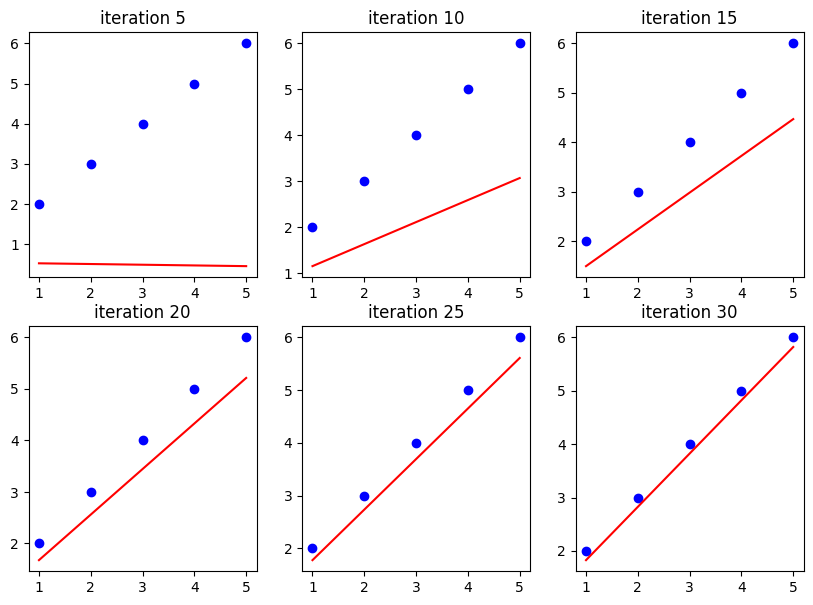

In [10]:
def plotResult(X,y,theta1, theta0, row=2, col=3):
  
  fig, axes = plt.subplots(row, col, figsize=(10, 7))
  theta0, theta1 = None, None
  
  for i in range(row):
    for j in range(col):
      loss, theta0, theta1 = linearRegression2Param(X, y, (i*15) + ((j+1)*5))
      predicted_y = prediction(theta0, theta1, X)
      
      axes[i][j].scatter(X, y, color='blue', label='Data Points')
      axes[i][j].plot(X, predicted_y, color='red', label='Predict')
      axes[i][j].set_title(f"iteration {(i*15) + ((j+1)*5)}")
      
  plt.show()
  
loss, theta0, theta1 = linearRegression2Param(X, y, 10)
plotResult(X,y,theta1, theta0)

### Linear regression with Multiple Features using Matrices and Linear Algebra

In [11]:
num_samples = 10

mean_vector = [2, 1, 3]  # Example values, adjust as needed

# Covariance matrix for 3 dimensions
covariance_matrix = [[1, 0.75, 0.5],  # Adjust these values as needed
                     [0.75, 1, 0.25],
                     [0.5, 0.25, 1]]

np.random.seed(42)
x_0 = np.random.multivariate_normal(mean_vector, covariance_matrix, num_samples)

X = np.hstack((np.ones((num_samples, 1)), x_0))

targetTheta = [1.5, 2, 3, -1]
y = np.matmul(X, targetTheta)

In [12]:
def generateRandomNumber_nFeatures(randomSeed, n):
  # Generate the theta array using random.random()
  random.seed(randomSeed)
  thetaArray = np.array([random.random() * 2 - 1 for i in range(n)])

  return thetaArray

In [13]:
def prediction_nFeatures(thetaArray, X):
  # prediction = 1 * bias + x1 * theta1, x2 * theta2 + ...
  h = np.dot(X, thetaArray)
  return h

thetaArray = generateRandomNumber_nFeatures(42,4)
h = prediction_nFeatures(thetaArray, X)
h

array([-3.01394892, -1.23419763, -1.01173445, -2.83264713, -3.31354378,
       -4.79332304, -5.54321629, -3.9163548 , -4.46748003, -3.14126657])

In [14]:
def mseLoss_nFeatures(h, y):
  loss = np.square(h-y).mean()
  return loss/2

mseLoss_nFeatures(h,y)

np.float64(30.199420142208574)

In [15]:
def gradients_nFeatures(h, y, X):
  # dThetaN = x1 * ThetaN + x2 * ThetaN + ...
  dThetaArray = (np.dot(X.T, (h - y))* 1/X.shape[0])
  return dThetaArray

gradients_nFeatures(h, y, X)

array([ -6.76533528, -13.63978924,  -6.53866163, -23.87364679])

In [16]:
def updateTheta_nFeatures( thetaArray, dThetaArray, learning_rate):
  # Backpropagation
  thetaArrayUpdated = thetaArray - learning_rate*dThetaArray
  return thetaArrayUpdated

thetaArrayUpdated = updateTheta_nFeatures( thetaArray, gradients_nFeatures(h, y, X), 0.01)
thetaArrayUpdated

array([ 0.34650695, -0.8135806 , -0.38455475, -0.31484206])

In [17]:
def linearRegressionMultiParam(X, y, iterations, learning_rate):
  thetaArray = generateRandomNumber_nFeatures(42, X.shape[1])
  loss = None

  for epoch in range(iterations):
    h = prediction_nFeatures(thetaArray, X)
    dThetaArray = gradients_nFeatures(h, y, X)
    thetaArray = updateTheta_nFeatures(thetaArray, dThetaArray, learning_rate)
    loss = mseLoss_nFeatures(h, y)

  return [loss, thetaArray]

loss, thetaArray = linearRegressionMultiParam(X, y, 10, 0.01)
print(loss, thetaArray)

4.377412803144978 [ 0.62008549 -0.19693099 -0.0540215   0.66186507]


### Apply to Boston Housing Dataset for Price Prediction

In [18]:
def readBostonHousingCsvFromFile():
  file_path = 'housing.csv'  # Replace with your file path

  # Read the file line by line
  with open(file_path, 'r') as file:
      lines = file.readlines()

  # Turn the csv file into a datframe
  df = pd.read_csv(file_path, sep='\s+', names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
  return df

df = readBostonHousingCsvFromFile()

In [19]:
# Change column names
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
83,0.03551,25.0,4.86,0,0.426,6.167,46.7,5.4007,4,281.0,19.0,390.64,7.51,22.9
81,0.04462,25.0,4.86,0,0.426,6.619,70.4,5.4007,4,281.0,19.0,395.63,7.22,23.9
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264.0,13.0,392.40,10.45,22.8
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666.0,20.2,393.82,10.29,20.2
165,2.92400,0.0,19.58,0,0.605,6.101,93.0,2.2834,5,403.0,14.7,240.16,9.81,25.0


In [20]:
from sklearn.model_selection import train_test_split

# Features and target
y = df['MEDV']  # Series with the target variable
X = df.drop( ['MEDV'], axis=1)

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df_X_train.to_numpy()
y = df_y_train.to_numpy()

X = np.hstack((np.ones(( len(y), 1)), X))

In [21]:
def trainModel(iterations, learning_rate):
  loss, thetaArray = linearRegressionMultiParam(X,y,iterations, learning_rate)
  return loss, thetaArray

In [22]:
iterations = 500
learning_rate = 6e-6
trainResult, thetaArray = trainModel( iterations,learning_rate )
print(trainResult)

60.762348161119945


Make prediction with the test data set.

In [23]:
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()
X_test = np.hstack((np.ones(( len(y_test), 1)), X_test))

thetaArray.shape

(14,)

In [24]:
h = prediction_nFeatures(thetaArray, X_test)

loss = mseLoss_nFeatures(h, y_test)
loss

np.float64(78.7641919630341)